In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[]

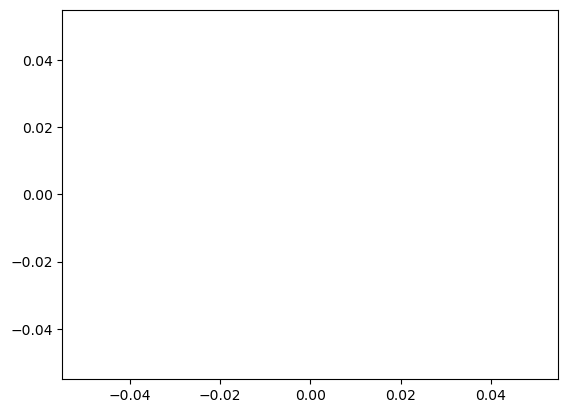

In [2]:
plt.plot()

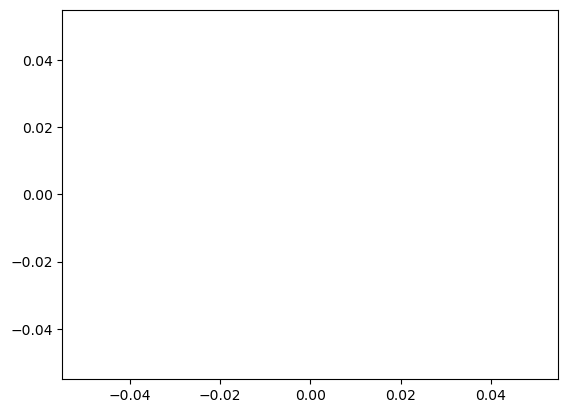

In [3]:
plt.plot()
plt.show()

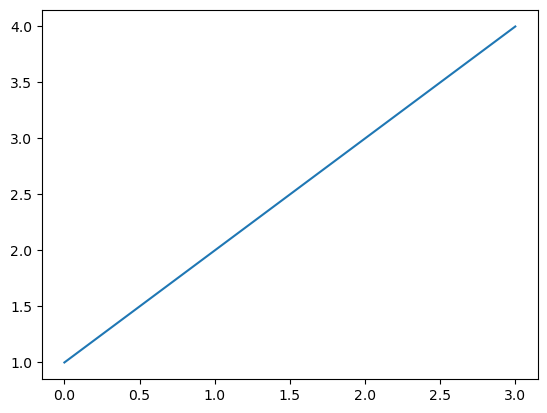

In [4]:
plt.plot([1,2,3,4]);

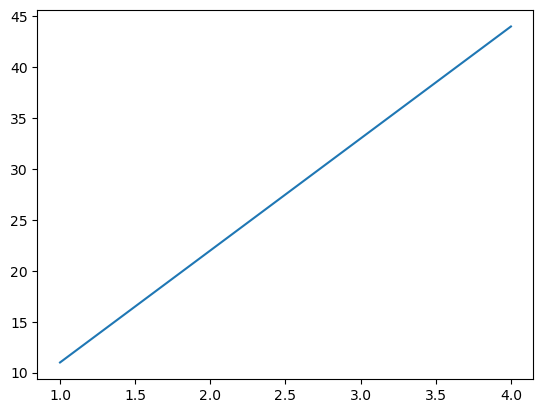

In [5]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y);

# 1st method

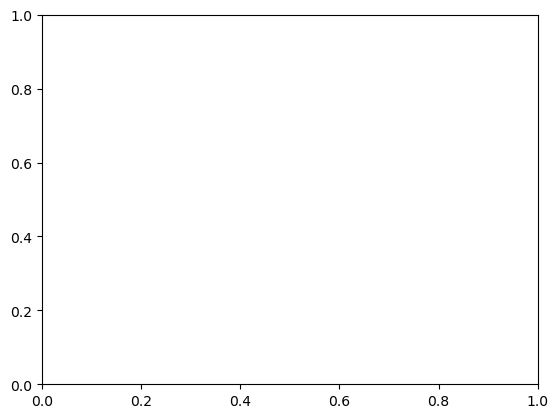

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

# 2nd method

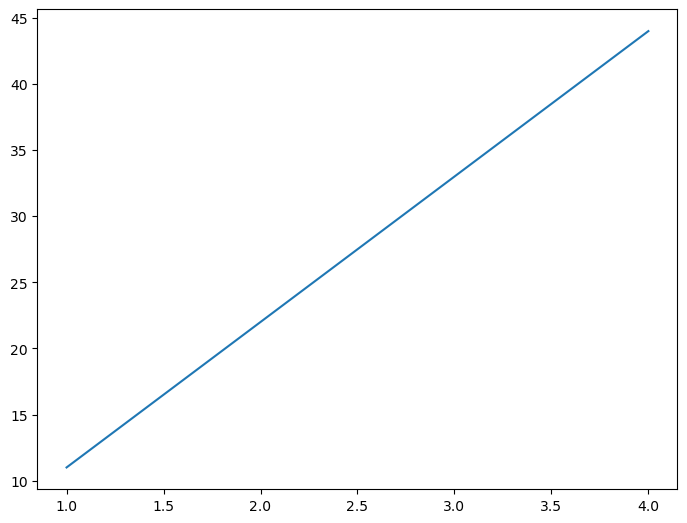

In [7]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

# 3rd method (recommended)

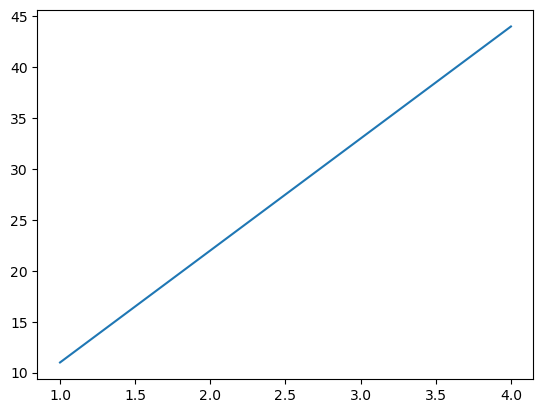

In [8]:
fig, ax = plt.subplots()
ax.plot(x,y)

<img src="images/matplotlib-anatomy-of-a-plot.png"/>

<img src="images/matplotlib-anatomy-of-a-plot-with-code.png"/>

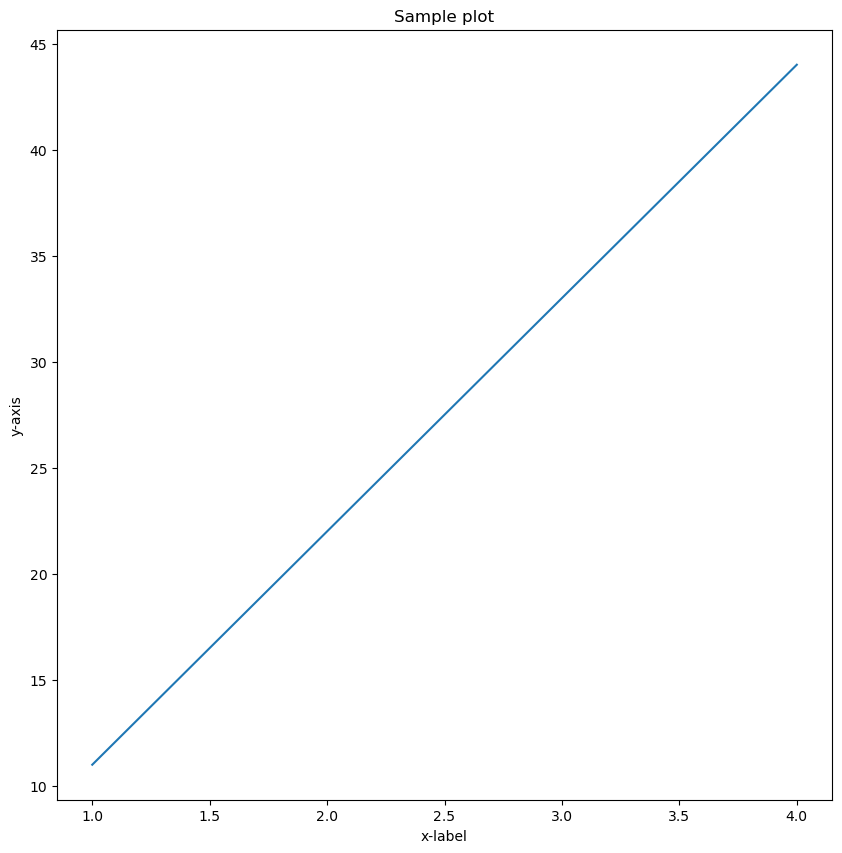

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1,2,3,4]
y = [11,22,33,44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample plot", xlabel="x-label", ylabel="y-axis")

# 5. Save and show
fig.savefig("images/sample-plot.png")


## Making figures with Numpy arrays

In [10]:
import numpy as np

In [11]:
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

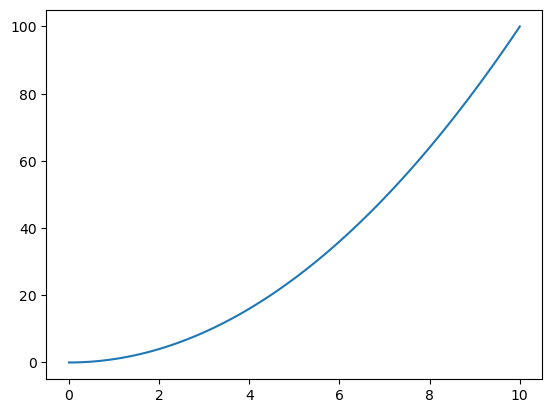

In [12]:
fig, ax = plt.subplots()
ax.plot(x, x**2)

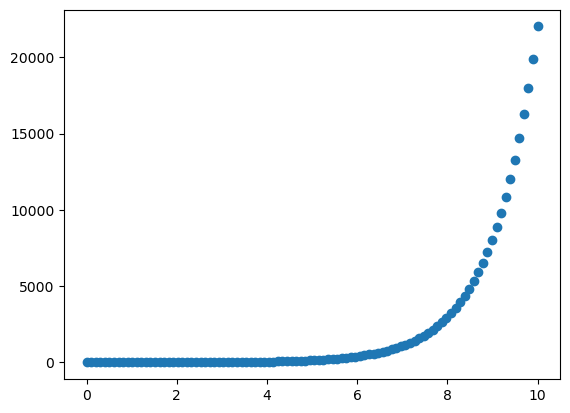

In [13]:
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))

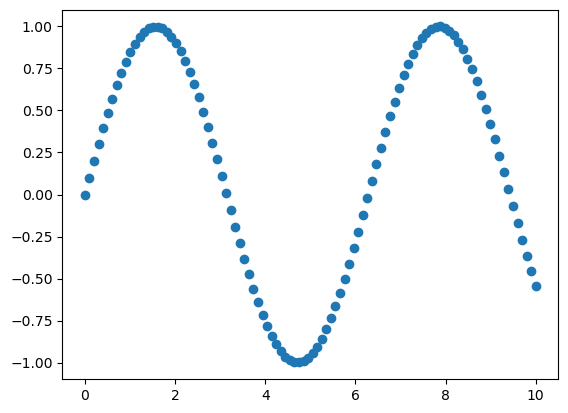

In [14]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x))

[Text(0.5, 1.0, 'Store'), Text(0, 0.5, 'Price ($)')]

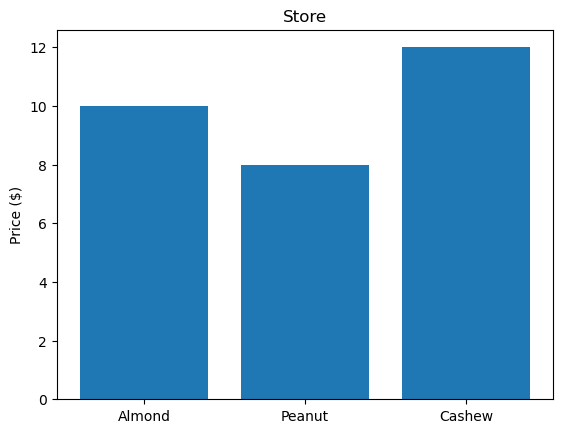

In [15]:
nut_butter_prices = {"Almond":10,"Peanut":8,"Cashew":12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Store", ylabel="Price ($)")

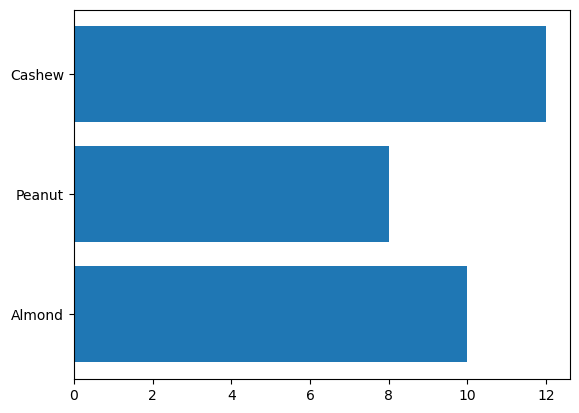

In [16]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values()));

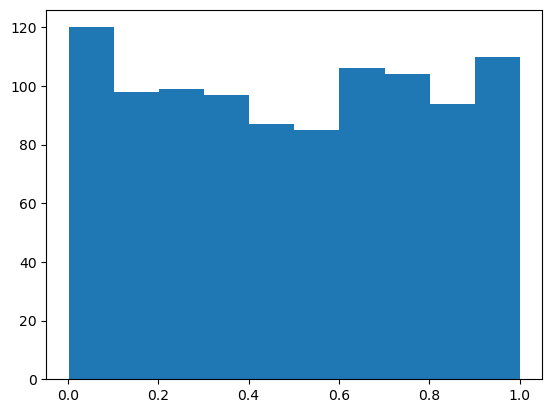

In [17]:
x = np.random.random(1000)
fig, ax = plt.subplots()
ax.hist(x);

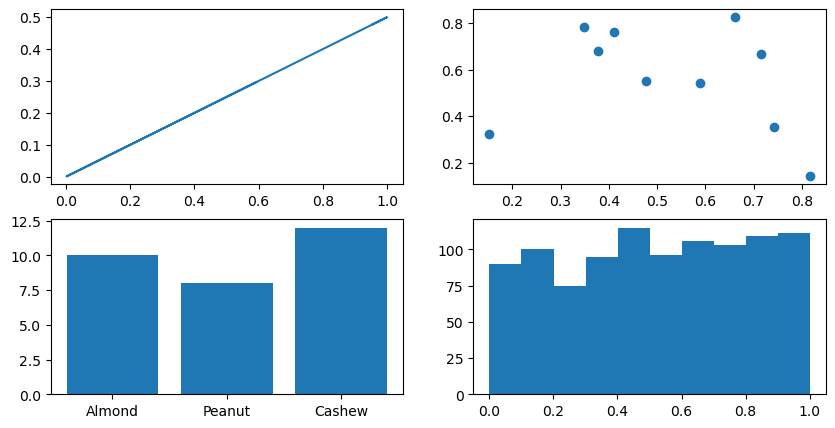

In [18]:
# subplots option 1
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,5))
ax1.plot(x,x/2);
ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.random(1000));

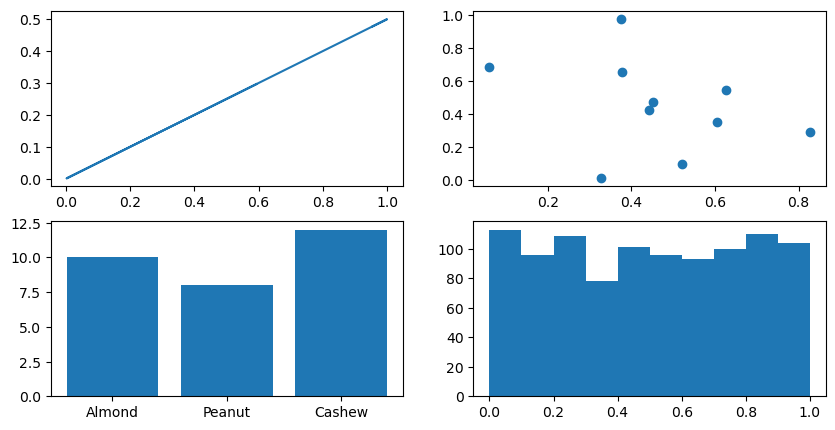

In [19]:
# subplots option 2
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,5))
ax[0,0].plot(x,x/2);
ax[0,1].scatter(np.random.random(10),np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.random(1000));

## Plotting from pandas DataFrames

<Axes: >

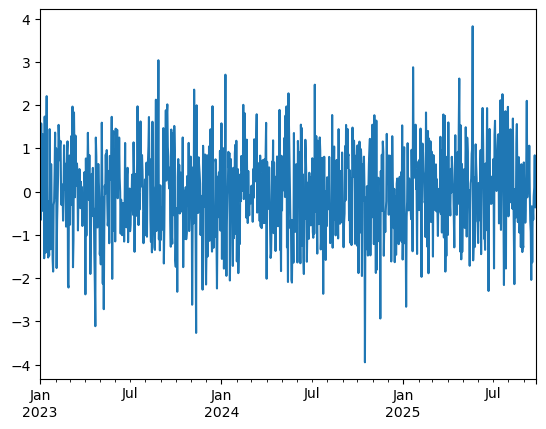

In [20]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2023", periods=1000))
ts.cumsum()
ts.plot()

In [21]:
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [22]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [23]:
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [24]:
car_sales["Sale Date"] = pd.date_range("1/1/2023", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2023-01-01
1,Honda,Red,87899,4,5000,2023-01-02
2,Toyota,Blue,32549,3,7000,2023-01-03
3,BMW,Black,11179,5,22000,2023-01-04
4,Nissan,White,213095,4,3500,2023-01-05
5,Toyota,Green,99213,4,4500,2023-01-06
6,Honda,Blue,45698,4,7500,2023-01-07
7,Honda,Blue,54738,4,7000,2023-01-08
8,Toyota,White,60000,4,6250,2023-01-09
9,Nissan,White,31600,4,9700,2023-01-10


In [25]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,9000
2,Toyota,Blue,32549,3,7000,2023-01-03,16000
3,BMW,Black,11179,5,22000,2023-01-04,38000
4,Nissan,White,213095,4,3500,2023-01-05,41500
5,Toyota,Green,99213,4,4500,2023-01-06,46000
6,Honda,Blue,45698,4,7500,2023-01-07,53500
7,Honda,Blue,54738,4,7000,2023-01-08,60500
8,Toyota,White,60000,4,6250,2023-01-09,66750
9,Nissan,White,31600,4,9700,2023-01-10,76450


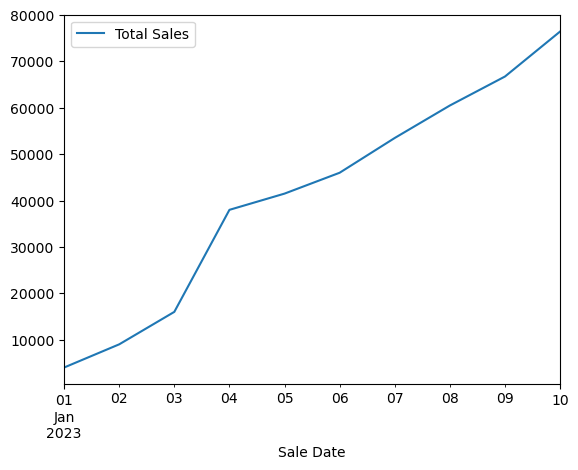

In [26]:
car_sales.plot(x="Sale Date", y="Total Sales");

In [27]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,9000
2,Toyota,Blue,32549,3,7000,2023-01-03,16000
3,BMW,Black,11179,5,22000,2023-01-04,38000
4,Nissan,White,213095,4,3500,2023-01-05,41500
5,Toyota,Green,99213,4,4500,2023-01-06,46000
6,Honda,Blue,45698,4,7500,2023-01-07,53500
7,Honda,Blue,54738,4,7000,2023-01-08,60500
8,Toyota,White,60000,4,6250,2023-01-09,66750
9,Nissan,White,31600,4,9700,2023-01-10,76450


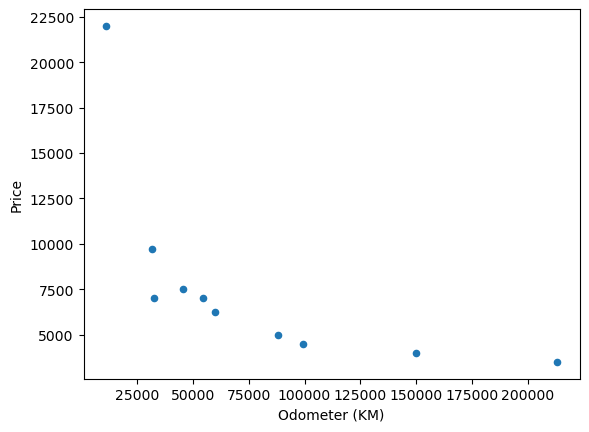

In [31]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

<Axes: >

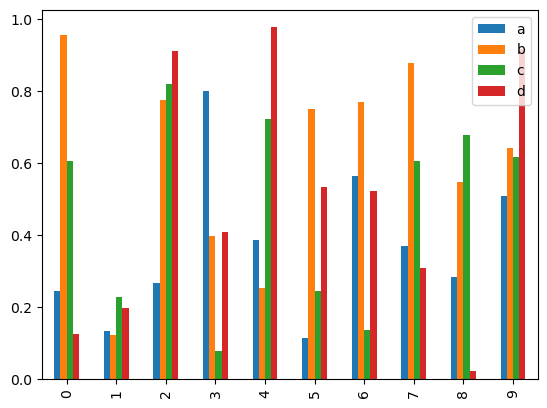

In [35]:
x = np.random.rand(10,4)
df = pd.DataFrame(x, columns=['a','b','c','d'])
df.plot.bar()

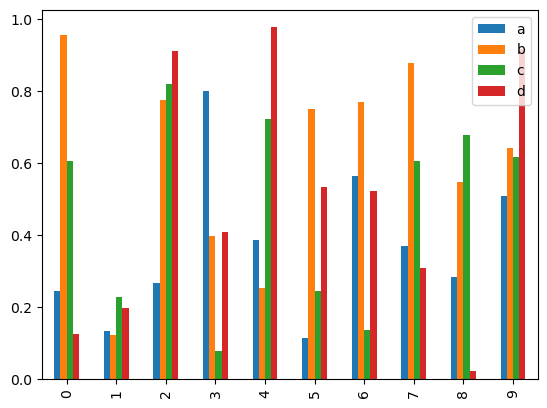

In [37]:
df.plot(kind="bar");

In [ ]:
car_sales.plot()